### Generating Plots for Paper

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from MuC import plot_tools as pt

light_factor = 0.5
LW=1.25

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

mu, sigma = 3.1, 3 # mean and standard deviation
kappas = np.random.normal(mu, sigma, 500)

In [3]:
def make_plot(EXP, ncurves=1000, cmapname='Blues'):
    if EXP=='LHC':
        name = r'LHC'
        kappas = np.linspace(-1.4, 6.1, ncurves)
    elif EXP=='LHC_HL':
        name = 'LHC-HL'
        kappas = np.linspace(-0.5, 0.5, ncurves) + 1
    elif EXP=='MuC3':
        name = 'MuC 3 TeV'
        kappas = np.linspace(-0.13,0.14, ncurves) + 1 
    elif EXP=='MuC10':
        name = 'MuC 10 TeV'
        kappas = np.linspace(-0.035,0.036, ncurves) + 1
    elif EXP=='MuC30':
        name = 'MuC 30 TeV'
        kappas = np.linspace(-0.011,0.012, ncurves) + 1
    else:
        raise ValueError('Unknown experiment')

    mu = np.mean(kappas)
    sigma = (kappas.max() - mu)/2
    prob = np.exp(-(kappas-mu)**2/2/sigma)
    prob /= prob.sum()

    cmap = cm = plt.get_cmap(cmapname) 
    cNorm  = colors.Normalize(vmin=prob.min()*0.8, vmax=prob.max()*1.2)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

    def get_V(x, kappa, mH=125.20, v=246.22):
        phi = x * v
        lam = mH/v
        # mu = lam * v / np.sqrt(2)
        lambda_3_SM = mH**2/2/v**2
        lambda_3 = lambda_3_SM * kappa
        V = mH**2/2 * phi**2 + lambda_3*v*phi**3+ lambda_3/4* phi**4
        return V/v**4
    fig, ax = pt.std_fig()

    x = np.linspace(-5, 2, 1000)
    ax.plot(x, get_V(x, kappa=1), color='black', label='Standard Model', zorder=2)
    ax.plot(x, get_V(x, kappa=kappas.min()), ls=(1,(3,1)), color='black', lw=0.5, zorder=2)
    ax.plot(x, get_V(x, kappa=kappas.max()), ls=(1,(3,1)), color='black', lw=0.5, zorder=2)


    for kappa, p in zip(kappas, prob):
        ax.plot(x, get_V(x, kappa=kappa), ls=(0,(3,0)), color=scalarMap.to_rgba(p), lw=1, zorder=1 + p)
    ax.fill_between(x, get_V(x, kappa=-1.25), get_V(x, kappa=6.49), facecolor='peachpuff', alpha=0.5, edgecolor='none',zorder=0.9)

    # plt.axhline(0, color='black', lw=1, ls=(1,(3,1)))
    # plt.axvline(-1, color='black', lw=1, ls=(1,(3,1)))
    ax.annotate(name, xy=(0.6, 0.8), xycoords='axes fraction', ha='center', va='center', fontsize=14, rotation=0)
    ax.set_xlim(-3.5,1.5)
    ax.set_ylim(-0.25,0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(r'$V(h)$',fontsize=14)
    ax.set_xlabel(r'$h$',fontsize=14)
    fig.savefig(f'plots/Higgs_potentials/Higgs_potential_{EXP}.pdf', bbox_inches='tight', dpi=500)

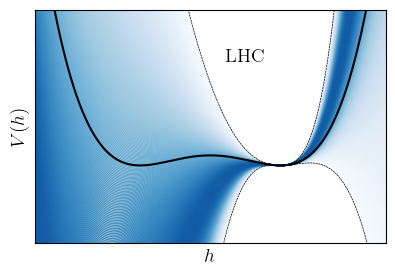

In [5]:
make_plot('LHC')

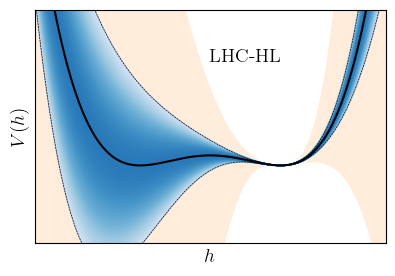

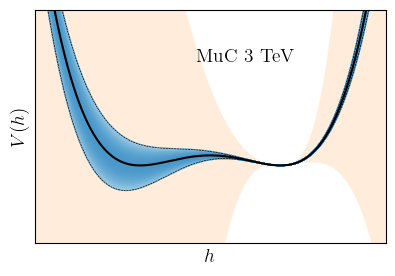

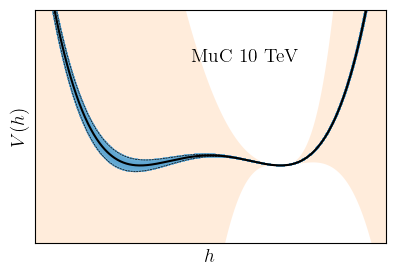

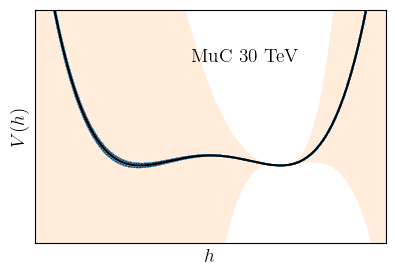

In [5]:
# make_plot('LHC')
make_plot('LHC_HL')
make_plot('MuC3')
make_plot('MuC10')
make_plot('MuC30')